<a href="https://colab.research.google.com/github/singwang-cn/Hajimeteno_pr/blob/master/ex5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import struct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [0]:
def load_image(datafile=''):
  path = '/content/drive/My Drive/Dataset/mnist dataset/'+datafile
  data = open(path, 'rb').read()
  magic_number, num_image, num_row, num_col = struct.unpack_from('>iiii', data, 0)
  offset = 16
  image_list = []
  for i in range(num_image):
    image = np.array(struct.unpack_from('>'+str(num_row*num_col)+'B', data, offset)).reshape(num_row,num_col)
    image_list.append(image)
    offset += int(num_row*num_col)
  return image_list

def load_label(datafile=''):
  path = '/content/drive/My Drive/Dataset/mnist dataset/'+datafile
  data = open(path, 'rb').read()
  magic_number, num_label = struct.unpack_from('>ii', data, 0)
  offset = 8
  label_list = []
  for i in range(num_label):
    label = struct.unpack_from('>B', data, offset)
    label_list.append(label[0])
    offset += 1
  return label_list

In [0]:
image_train = load_image('train-images.idx3-ubyte')
label_train = load_label('train-labels.idx1-ubyte')
image_test = load_image('t10k-images.idx3-ubyte')
label_test = load_label('t10k-labels.idx1-ubyte')

In [0]:
class image_with_label():
  def __init__(self, image, label):
    self.image = image
    self.label = label
  def show(self):
    plt.imshow(self.image)
    print("Label: {}".format(self.label))

In [0]:
data_train = [image_with_label(image_train[i],label_train[i]) for i in range(len(image_train))]
data_test = [image_with_label(image_test[i],label_test[i]) for i in range(len(image_test))]

In [0]:
def k_nearest_neighbor(in_image, template, k=1):
  vote_to_classes = [0 for i in range(10)]
  distance_of_all = [[sum(np.square(template[i].image.flatten() - in_image.flatten())),i] for i in range(len(template))]
  class_iterator = 0

  sorted_distance = sorted(distance_of_all, key=lambda x:x[0])

  for i in range(k):
    vote_to_classes[template[sorted_distance[i][1]].label] += 1
  print("The result of vote:")


  result_vote = {str(i):[vote_to_classes[i]] for i in range(10)}
  print(pd.DataFrame(result_vote))
  result = vote_to_classes.index(max(vote_to_classes))
  print("The result is:")
  return result

In [23]:
k_nearest_neighbor(image_test[666], data_train, 1000)

The result of vote:
   0  1  2  3   4  5  6    7  8    9
0  0  2  0  1  39  0  0  683  0  275
The result is:


7

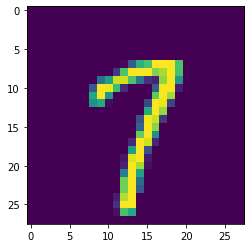

In [24]:
plt.imshow(image_test[666])

In [4]:
X_train = [x.flatten() for x in image_train]
knn = KNeighborsClassifier(n_neighbors=10000)

knn.fit(X_train, label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10000, p=2,
                     weights='uniform')

In [5]:
knn.predict([image_test[0].flatten()])

array([7])